In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/data_files/Raisin_Dataset.xlsx")

In [ ]:
data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [ ]:
data.tail()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni
899,85609,512.081774,215.271976,0.907345,89197,0.632020,1272.862,Besni


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [ ]:
data.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

In [ ]:
data.shape

(900, 8)

In [ ]:
data["Class"].value_counts()

Kecimen    450
Besni      450
Name: Class, dtype: int64

In [ ]:
data.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


In [ ]:
data.isna().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

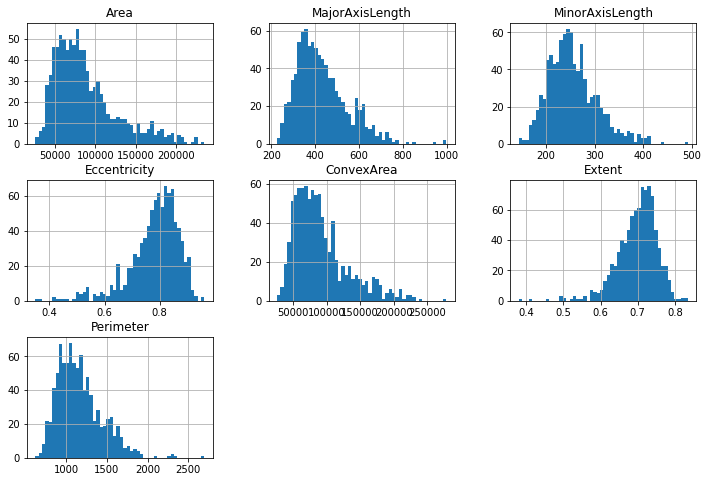

In [ ]:
data.hist(bins=50, figsize=(12,8))
plt.show()

In [ ]:
data["Class"].value_counts()/len(data)

Kecimen    0.5
Besni      0.5
Name: Class, dtype: float64

In [ ]:
X = data.drop("Class", axis=1)
Y = data["Class"]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y, random_state=42)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)

(900, 7) (720, 7) (180, 7)
(900,) (720,) (180,)


In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print(testing_data_accuracy)

0.8888888888888888


In [ ]:
model.fit(X_train.values, Y_train.values)

LogisticRegression()

In [ ]:
def predict_class(input_instance):
  instance_nparr = np.asarray(input_instance)
  instance_nparr = instance_nparr.reshape(1,-1)
  prediction = model.predict(instance_nparr)
  return prediction[0]

In [ ]:
input_instance = (80928	,400.540559	,289.760042	,0.784989	,87336	,0.699599	,1044.162	)
print(predict_class(input_instance))
input_instance = [82928	,400.540559	,200.760042	,0.784989	,87336	,0.699599	,1208.162	]
print(predict_class(input_instance))

Kecimen
Besni


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier(random_state=0)

In [ ]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
test_prediction = clf.predict(X_test)
test_data_accuracy = accuracy_score(test_prediction, Y_test)

In [ ]:
print(test_data_accuracy)

0.85
